<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/CNN_stock_v12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
#!pip install yfinance
#!pip install finta
#!pip install --upgrade pandas
#!pip install --upgrade pandas-datareader

# 載入資料

https://sharegpt.com/c/nwqFGKt

In [54]:
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
import seaborn as sns
yf.pdr_override()
y_symbols = ["^TWII"]
from datetime import datetime
startdate = datetime(2008,1,1)
enddate = datetime(2018,1,1)
df = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)
print(df.shape)
display(df.head(3))
display(df.tail(3))

[*********************100%***********************]  1 of 1 completed
(2460, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,8491.5703,8532.9199,8319.5801,8323.0498,8323.0176,4372600
2008-01-03,8171.6802,8243.9297,8130.4102,8184.2002,8184.1694,3636400
2008-01-04,8134.0400,8247.1797,8097.8501,8221.0996,8221.0674,4603600


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-27,10419.8096,10497.7695,10419.8096,10486.6699,10486.6699,2103300
2017-12-28,10513.2900,10592.0400,10513.2900,10567.6396,10567.6396,2223700
2017-12-29,10590.9502,10659.9805,10590.9502,10642.8604,10642.8604,2411700


# Label triple_barrier

https://sharegpt.com/c/Eir89kz

In [55]:
import numpy as np
import math
def triple_barrier_signal(price,ub,lb,t):
  '''
  triple-barrier包含2個horizontal barrier，1個vertical barrier。
  首先解釋一下這3个barrier：
  根據3个barrier中第一個被touch的進行label
  barrier 1 (the upper barrier)首先達到，label 1
  barrier 2（the lower barrier)首先達到，label -1
  如果barrier 1和barrier 2都没有達到，则barrier 3達到，label 0
  '''
  signal = []
  for i in range(len(price)-t):
    # 情況1.如果price[i:i+t+1]這段序列有任何元素的值大於price[i]*ub則signal[i] = 1
    if max(price[i:i+t+1]) > price[i] * ub:
      signal.append(1)
    # 情況2.如果price[i:i+t+1]這段序列有任何元素的值低於price[i]*lb則signal[i] = -1
    elif min(price[i:i+t+1]) < price[i] * lb:
      signal.append(-1)
    # 如果以上情況1和情況2都沒有發生則signal[i] = 0
    else:
      signal.append(0)
  return signal

ret = triple_barrier_signal(df.Close.values.tolist(),1.03,0.97,20)
df = df.head(len(ret))
df['triple_barrier_signal'] = ret

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6372\1125190979.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['triple_barrier_signal'] = ret


# check 'triple_barrier_signal'

In [56]:
df.tail(20)

,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal
Date,,,,,,,
2017-11-06,10856.5596,10858.5000,10769.1904,10786.1904,10786.1904,2241200,0
2017-11-07,10820.8301,10842.6104,10807.8896,10840.3398,10840.3398,2593500,0
2017-11-08,10839.4404,10844.7402,10806.0098,10818.9902,10818.9902,2513400,-1
2017-11-09,10802.9502,10831.3799,10721.8701,10743.2695,10743.2695,3008000,-1
2017-11-10,10713.6699,10742.6104,10659.2900,10732.6699,10732.6699,2347400,-1
2017-11-13,10728.2197,10749.3896,10683.9199,10683.9199,10683.9199,2850600,-1
2017-11-14,10716.5898,10735.0801,10654.5801,10687.1797,10687.1797,2676900,-1
2017-11-15,10662.0801,10669.5898,10600.2598,10630.6504,10630.6504,2325600,0
2017-11-16,10629.1602,10666.6602,10609.2305,10625.0400,10625.0400,2189300,0


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='triple_barrier_signal', ylabel='count'>

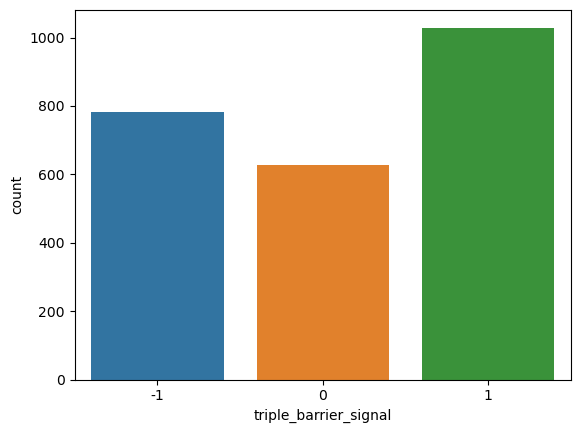

In [57]:
df['triple_barrier_signal'].value_counts()
sns.countplot(df['triple_barrier_signal'])

# plot buy price and sell price

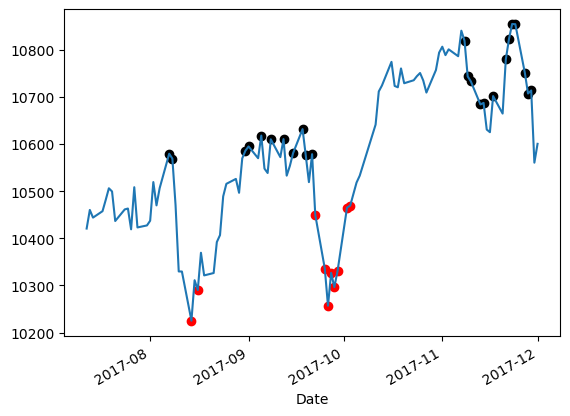

In [58]:
import matplotlib.pyplot as plt

df_recent = df.tail(100)
buy = df_recent[df_recent['triple_barrier_signal']==1]['Close']
sell = df_recent[df_recent['triple_barrier_signal']==-1]['Close']
df_recent['Close'].plot()#後20筆是前20筆的驗證
plt.scatter(buy.index,buy.values,color='red')
plt.scatter(sell.index,sell.values,color='black')
plt.show()

# 建立ohlcv

In [59]:
from finta import TA
ohlcv = df[['Open','High','Low','Close','Volume']]
ohlcv.columns = ['open','high','low','close','volume']

# 計算技術指標RSI

https://sharegpt.com/c/lXPO7as

count   2439.0000
mean      52.4968
std       12.4751
min        0.0000
25%       43.8183
50%       53.8318
75%       61.7164
max       82.3669
Name: RSI, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6372\80940770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = TA.RSI(ohlcv)
c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI
Date,,,,,,,,
2017-11-27,10836.8203,10856.0000,10746.7402,10750.9297,10750.9297,2668100,-1,51.8056
2017-11-28,10733.5596,10752.5801,10692.5303,10707.0703,10707.0703,2961000,-1,48.0033
2017-11-29,10735.2402,10762.9102,10697.6201,10713.5498,10713.5498,3096300,-1,48.6035
2017-11-30,10623.2002,10650.1797,10560.4404,10560.4404,10560.4404,4939100,0,37.5687
2017-12-01,10591.6201,10665.9199,10495.1504,10600.3701,10600.3701,3776200,0,41.3110


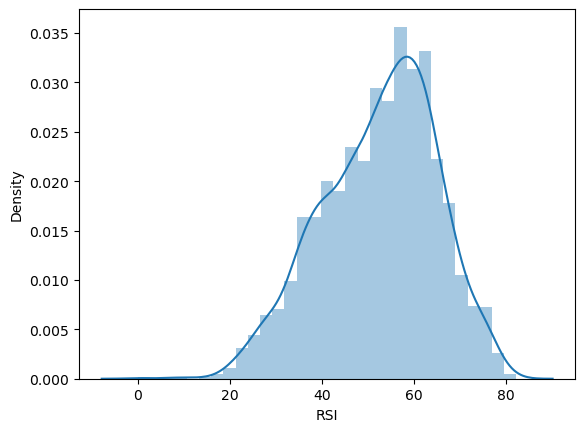

In [60]:
df['RSI'] = TA.RSI(ohlcv)
print(df['RSI'].describe())
sns.distplot(df['RSI'].dropna())
df.tail()

# 計算威廉指標

count   2427.0000
mean     -42.8045
std       32.1322
min     -100.0000
25%      -72.2049
50%      -37.6398
75%      -12.6047
max       -0.0000
Name: Williams %R, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6372\4271450618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Williams %R'] = TA.WILLIAMS(ohlcv)
c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R
Date,,,,,,,,,
2017-11-27,10836.8203,10856.0000,10746.7402,10750.9297,10750.9297,2668100,-1,51.8056,-46.6449
2017-11-28,10733.5596,10752.5801,10692.5303,10707.0703,10707.0703,2961000,-1,48.0033,-62.1763
2017-11-29,10735.2402,10762.9102,10697.6201,10713.5498,10713.5498,3096300,-1,48.6035,-59.8818
2017-11-30,10623.2002,10650.1797,10560.4404,10560.4404,10560.4404,4939100,0,37.5687,-100.0000
2017-12-01,10591.6201,10665.9199,10495.1504,10600.3701,10600.3701,3776200,0,41.3110,-72.8465


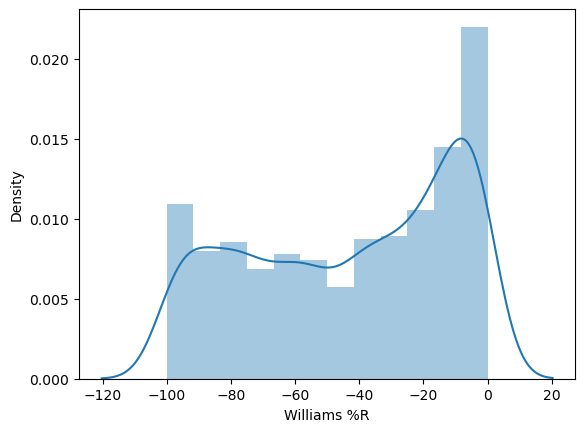

In [61]:
df['Williams %R'] = TA.WILLIAMS(ohlcv)
print(df['Williams %R'].describe())
sns.distplot(df['Williams %R'].dropna())
df.tail()

# SMA

count    2400.0000
mean     8167.1424
std      1223.8877
min      4461.4230
25%      7546.7448
50%      8253.9699
75%      8915.5335
max     10719.0485
Name: SMA, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6372\1878676325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMA'] = TA.SMA(ohlcv)
c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA
Date,,,,,,,,,,
2017-11-27,10836.8203,10856.0000,10746.7402,10750.9297,10750.9297,2668100,-1,51.8056,-46.6449,10690.6778
2017-11-28,10733.5596,10752.5801,10692.5303,10707.0703,10707.0703,2961000,-1,48.0033,-62.1763,10699.9556
2017-11-29,10735.2402,10762.9102,10697.6201,10713.5498,10713.5498,3096300,-1,48.6035,-59.8818,10710.1288
2017-11-30,10623.2002,10650.1797,10560.4404,10560.4404,10560.4404,4939100,0,37.5687,-100.0000,10715.7507
2017-12-01,10591.6201,10665.9199,10495.1504,10600.3701,10600.3701,3776200,0,41.3110,-72.8465,10719.0485


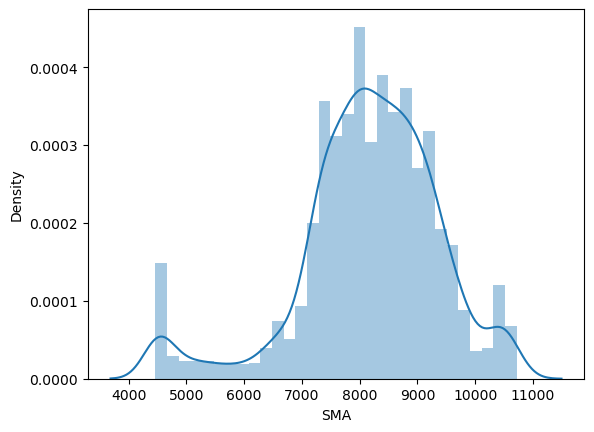

In [62]:
df['SMA'] = TA.SMA(ohlcv)
print(df['SMA'].describe())
sns.distplot(df['SMA'].dropna())
df.tail()

# EMA

count    2440.0000
mean     8182.3706
std      1246.7141
min      4300.8002
25%      7563.2029
50%      8249.9663
75%      8976.0160
max     10791.8770
Name: EMA, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6372\3115164127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA'] = TA.EMA(ohlcv)
c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA
Date,,,,,,,,,,,
2017-11-27,10836.8203,10856.0000,10746.7402,10750.9297,10750.9297,2668100,-1,51.8056,-46.6449,10690.6778,10771.4790
2017-11-28,10733.5596,10752.5801,10692.5303,10707.0703,10707.0703,2961000,-1,48.0033,-62.1763,10699.9556,10758.5973
2017-11-29,10735.2402,10762.9102,10697.6201,10713.5498,10713.5498,3096300,-1,48.6035,-59.8818,10710.1288,10749.5878
2017-11-30,10623.2002,10650.1797,10560.4404,10560.4404,10560.4404,4939100,0,37.5687,-100.0000,10715.7507,10711.7583
2017-12-01,10591.6201,10665.9199,10495.1504,10600.3701,10600.3701,3776200,0,41.3110,-72.8465,10719.0485,10689.4807


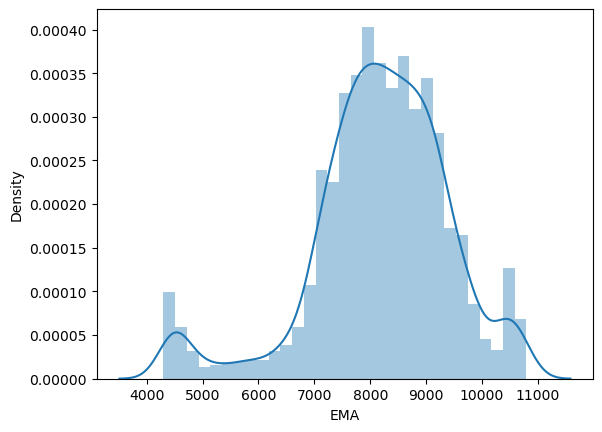

In [63]:
df['EMA'] = TA.EMA(ohlcv)
print(df['EMA'].describe())
sns.distplot(df['EMA'])
df.tail()

# WMA

count    2432.0000
mean     8183.9337
std      1253.1930
min      4234.7189
25%      7560.7884
50%      8256.4287
75%      8994.1397
max     10803.8627
Name: WMA, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6372\1037319935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WMA'] = TA.WMA(ohlcv)
c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA
Date,,,,,,,,,,,,
2017-11-27,10836.8203,10856.0000,10746.7402,10750.9297,10750.9297,2668100,-1,51.8056,-46.6449,10690.6778,10771.4790,10778.8593
2017-11-28,10733.5596,10752.5801,10692.5303,10707.0703,10707.0703,2961000,-1,48.0033,-62.1763,10699.9556,10758.5973,10771.7556
2017-11-29,10735.2402,10762.9102,10697.6201,10713.5498,10713.5498,3096300,-1,48.6035,-59.8818,10710.1288,10749.5878,10764.2495
2017-11-30,10623.2002,10650.1797,10560.4404,10560.4404,10560.4404,4939100,0,37.5687,-100.0000,10715.7507,10711.7583,10724.1547
2017-12-01,10591.6201,10665.9199,10495.1504,10600.3701,10600.3701,3776200,0,41.3110,-72.8465,10719.0485,10689.4807,10695.1836


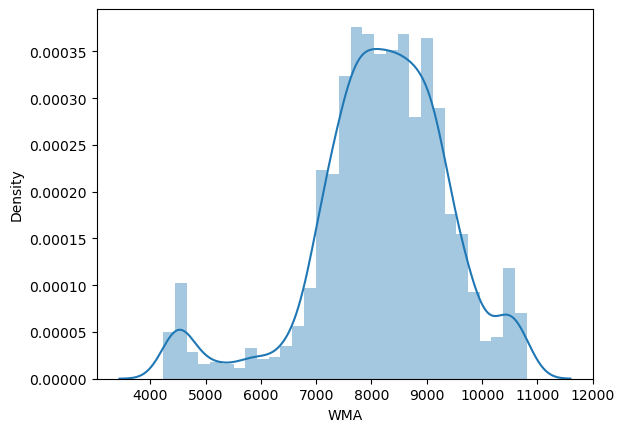

In [64]:
df['WMA'] = TA.WMA(ohlcv)
print(df['WMA'].describe())
sns.distplot(df['WMA'].dropna())
df.tail()

# HMA

count    2422.0000
mean     8186.7117
std      1264.6263
min      4094.4014
25%      7548.7275
50%      8279.0542
75%      9011.3992
max     10819.7084
Name: HMA, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6372\1554131951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HMA'] = TA.HMA(ohlcv)
c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA
Date,,,,,,,,,,,,,
2017-11-27,10836.8203,10856.0000,10746.7402,10750.9297,10750.9297,2668100,-1,51.8056,-46.6449,10690.6778,10771.4790,10778.8593,10801.4256
2017-11-28,10733.5596,10752.5801,10692.5303,10707.0703,10707.0703,2961000,-1,48.0033,-62.1763,10699.9556,10758.5973,10771.7556,10810.8021
2017-11-29,10735.2402,10762.9102,10697.6201,10713.5498,10713.5498,3096300,-1,48.6035,-59.8818,10710.1288,10749.5878,10764.2495,10803.1265
2017-11-30,10623.2002,10650.1797,10560.4404,10560.4404,10560.4404,4939100,0,37.5687,-100.0000,10715.7507,10711.7583,10724.1547,10765.3660
2017-12-01,10591.6201,10665.9199,10495.1504,10600.3701,10600.3701,3776200,0,41.3110,-72.8465,10719.0485,10689.4807,10695.1836,10716.1467


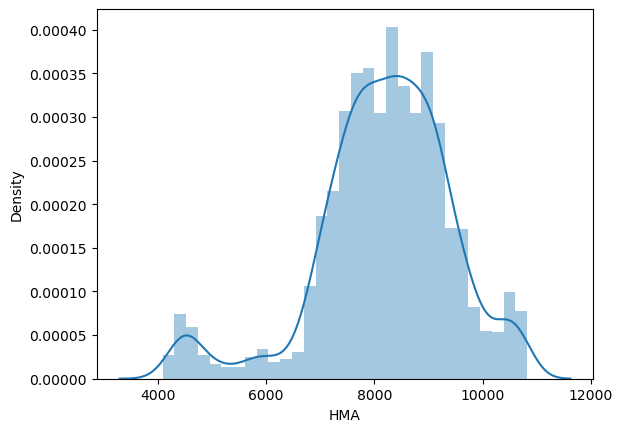

In [65]:
df['HMA'] = TA.HMA(ohlcv)
print(df['HMA'].describe())
sns.distplot(df['HMA'].dropna())
df.tail()

# TEMA

count    2440.0000
mean     8186.5381
std      1258.8024
min      4104.9841
25%      7555.0573
50%      8274.7014
75%      8999.6324
max     10844.0101
Name: TEMA, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6372\348095914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TEMA'] = TA.TEMA(ohlcv)
c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA
Date,,,,,,,,,,,,,,
2017-11-27,10836.8203,10856.0000,10746.7402,10750.9297,10750.9297,2668100,-1,51.8056,-46.6449,10690.6778,10771.4790,10778.8593,10801.4256,10812.0876
2017-11-28,10733.5596,10752.5801,10692.5303,10707.0703,10707.0703,2961000,-1,48.0033,-62.1763,10699.9556,10758.5973,10771.7556,10810.8021,10768.4651
2017-11-29,10735.2402,10762.9102,10697.6201,10713.5498,10713.5498,3096300,-1,48.6035,-59.8818,10710.1288,10749.5878,10764.2495,10803.1265,10742.9017
2017-11-30,10623.2002,10650.1797,10560.4404,10560.4404,10560.4404,4939100,0,37.5687,-100.0000,10715.7507,10711.7583,10724.1547,10765.3660,10651.8030
2017-12-01,10591.6201,10665.9199,10495.1504,10600.3701,10600.3701,3776200,0,41.3110,-72.8465,10719.0485,10689.4807,10695.1836,10716.1467,10614.1731


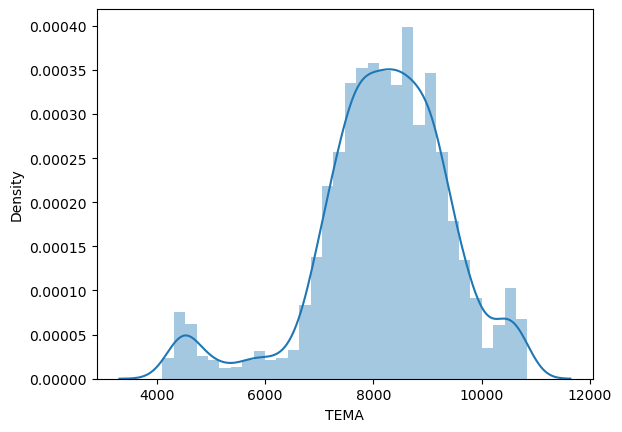

In [66]:
df['TEMA'] = TA.TEMA(ohlcv)
print(df['TEMA'].describe())
sns.distplot(df['TEMA'].dropna())
df.tail()

# CCI

count   2439.0000
mean      14.9754
std      110.5569
min     -367.4168
25%      -71.8450
50%       33.6958
75%      101.3122
max      347.4393
Name: CCI, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6372\4109371288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CCI'] = TA.CCI(ohlcv)
c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI
Date,,,,,,,,,,,,,,,
2017-11-27,10836.8203,10856.0000,10746.7402,10750.9297,10750.9297,2668100,-1,51.8056,-46.6449,10690.6778,10771.4790,10778.8593,10801.4256,10812.0876,24.3347
2017-11-28,10733.5596,10752.5801,10692.5303,10707.0703,10707.0703,2961000,-1,48.0033,-62.1763,10699.9556,10758.5973,10771.7556,10810.8021,10768.4651,-46.2921
2017-11-29,10735.2402,10762.9102,10697.6201,10713.5498,10713.5498,3096300,-1,48.6035,-59.8818,10710.1288,10749.5878,10764.2495,10803.1265,10742.9017,-33.9320
2017-11-30,10623.2002,10650.1797,10560.4404,10560.4404,10560.4404,4939100,0,37.5687,-100.0000,10715.7507,10711.7583,10724.1547,10765.3660,10651.8030,-157.8802
2017-12-01,10591.6201,10665.9199,10495.1504,10600.3701,10600.3701,3776200,0,41.3110,-72.8465,10719.0485,10689.4807,10695.1836,10716.1467,10614.1731,-141.5523


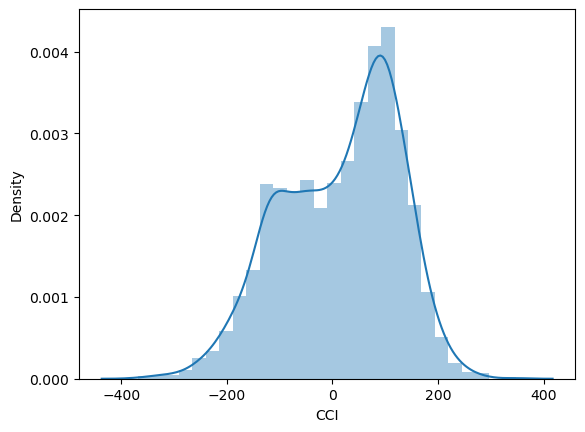

In [67]:
df['CCI'] = TA.CCI(ohlcv)
print(df['CCI'].describe())
sns.distplot(df['CCI'].dropna())
df.tail()

# CMO

count   2439.0000
mean       5.4414
std       29.5094
min     -100.0000
25%      -15.3229
50%        8.3159
75%       27.1838
max       78.4165
Name: CMO, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6372\2048488867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CMO'] = TA.CMO(ohlcv)
c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO
Date,,,,,,,,,,,,,,,,
2017-11-27,10836.8203,10856.0000,10746.7402,10750.9297,10750.9297,2668100,-1,51.8056,-46.6449,10690.6778,10771.4790,10778.8593,10801.4256,10812.0876,24.3347,0.4619
2017-11-28,10733.5596,10752.5801,10692.5303,10707.0703,10707.0703,2961000,-1,48.0033,-62.1763,10699.9556,10758.5973,10771.7556,10810.8021,10768.4651,-46.2921,-9.4746
2017-11-29,10735.2402,10762.9102,10697.6201,10713.5498,10713.5498,3096300,-1,48.6035,-59.8818,10710.1288,10749.5878,10764.2495,10803.1265,10742.9017,-33.9320,-7.7256
2017-11-30,10623.2002,10650.1797,10560.4404,10560.4404,10560.4404,4939100,0,37.5687,-100.0000,10715.7507,10711.7583,10724.1547,10765.3660,10651.8030,-157.8802,-34.9933
2017-12-01,10591.6201,10665.9199,10495.1504,10600.3701,10600.3701,3776200,0,41.3110,-72.8465,10719.0485,10689.4807,10695.1836,10716.1467,10614.1731,-141.5523,-24.3458


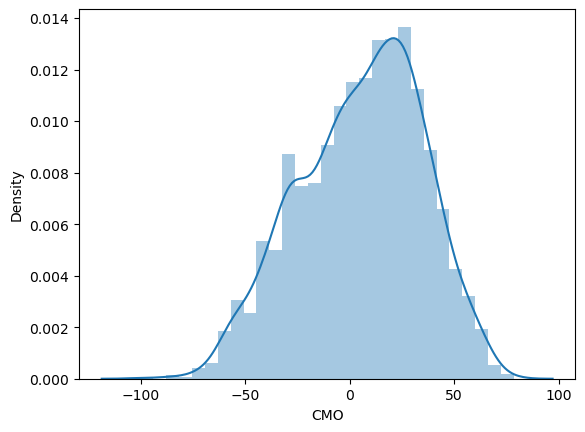

In [68]:
df['CMO'] = TA.CMO(ohlcv)
print(df['CMO'].describe())
sns.distplot(df['CMO'].dropna())
df.tail()

# MACD

count   2440.0000
mean       0.0339
std       28.2714
min     -129.9043
25%      -17.7211
50%        0.3331
75%       17.9639
max       84.1810
Name: MACD, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6372\2662787808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MACD'] = TA.MACD(ohlcv)['MACD'] - TA.MACD(ohlcv)['SIGNAL']
c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD
Date,,,,,,,,,,,,,,,,,
2017-11-27,10836.8203,10856.0000,10746.7402,10750.9297,10750.9297,2668100,-1,51.8056,-46.6449,10690.6778,10771.4790,10778.8593,10801.4256,10812.0876,24.3347,0.4619,3.1244
2017-11-28,10733.5596,10752.5801,10692.5303,10707.0703,10707.0703,2961000,-1,48.0033,-62.1763,10699.9556,10758.5973,10771.7556,10810.8021,10768.4651,-46.2921,-9.4746,-2.8993
2017-11-29,10735.2402,10762.9102,10697.6201,10713.5498,10713.5498,3096300,-1,48.6035,-59.8818,10710.1288,10749.5878,10764.2495,10803.1265,10742.9017,-33.9320,-7.7256,-6.3501
2017-11-30,10623.2002,10650.1797,10560.4404,10560.4404,10560.4404,4939100,0,37.5687,-100.0000,10715.7507,10711.7583,10724.1547,10765.3660,10651.8030,-157.8802,-34.9933,-18.1775
2017-12-01,10591.6201,10665.9199,10495.1504,10600.3701,10600.3701,3776200,0,41.3110,-72.8465,10719.0485,10689.4807,10695.1836,10716.1467,10614.1731,-141.5523,-24.3458,-22.2744


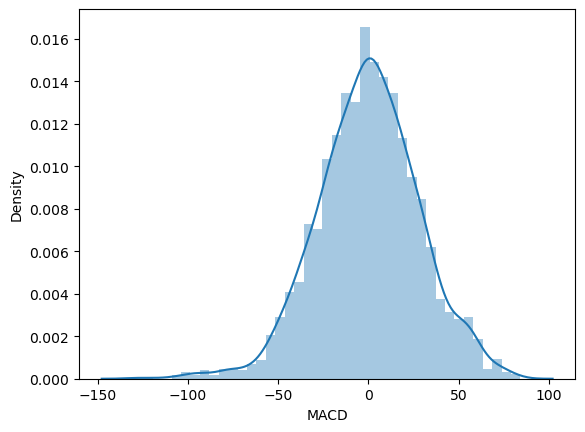

In [69]:
df['MACD'] = TA.MACD(ohlcv)['MACD'] - TA.MACD(ohlcv)['SIGNAL']
print(df['MACD'].describe())
sns.distplot(df['MACD'].dropna())
df.tail()

# PPO

count   2440.0000
mean       0.0003
std        0.3816
min       -1.5488
25%       -0.2201
50%       -0.0036
75%        0.2158
max        1.5197
Name: PPO, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6372\3095035729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PPO'] = TA.PPO(ohlcv)['PPO'] - TA.PPO(ohlcv)['SIGNAL']
c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO
Date,,,,,,,,,,,,,,,,,,
2017-11-27,10836.8203,10856.0000,10746.7402,10750.9297,10750.9297,2668100,-1,51.8056,-46.6449,10690.6778,10771.4790,10778.8593,10801.4256,10812.0876,24.3347,0.4619,3.1244,0.0287
2017-11-28,10733.5596,10752.5801,10692.5303,10707.0703,10707.0703,2961000,-1,48.0033,-62.1763,10699.9556,10758.5973,10771.7556,10810.8021,10768.4651,-46.2921,-9.4746,-2.8993,-0.0273
2017-11-29,10735.2402,10762.9102,10697.6201,10713.5498,10713.5498,3096300,-1,48.6035,-59.8818,10710.1288,10749.5878,10764.2495,10803.1265,10742.9017,-33.9320,-7.7256,-6.3501,-0.0594
2017-11-30,10623.2002,10650.1797,10560.4404,10560.4404,10560.4404,4939100,0,37.5687,-100.0000,10715.7507,10711.7583,10724.1547,10765.3660,10651.8030,-157.8802,-34.9933,-18.1775,-0.1696
2017-12-01,10591.6201,10665.9199,10495.1504,10600.3701,10600.3701,3776200,0,41.3110,-72.8465,10719.0485,10689.4807,10695.1836,10716.1467,10614.1731,-141.5523,-24.3458,-22.2744,-0.2078


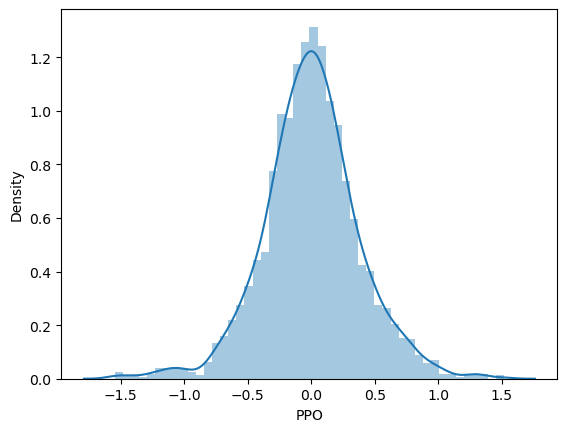

In [70]:
df['PPO'] = TA.PPO(ohlcv)['PPO'] - TA.PPO(ohlcv)['SIGNAL']
print(df['PPO'].describe())
sns.distplot(df['PPO'].dropna())
df.tail()

# ROC

count   2428.0000
mean       0.2222
std        4.1105
min      -18.7921
25%       -1.7646
50%        0.5071
75%        2.5827
max       17.1667
Name: ROC, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6372\1860037326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROC'] = TA.ROC(ohlcv)
c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC
Date,,,,,,,,,,,,,,,,,,,
2017-11-27,10836.8203,10856.0000,10746.7402,10750.9297,10750.9297,2668100,-1,51.8056,-46.6449,10690.6778,10771.4790,10778.8593,10801.4256,10812.0876,24.3347,0.4619,3.1244,0.0287,0.0713
2017-11-28,10733.5596,10752.5801,10692.5303,10707.0703,10707.0703,2961000,-1,48.0033,-62.1763,10699.9556,10758.5973,10771.7556,10810.8021,10768.4651,-46.2921,-9.4746,-2.8993,-0.0273,-0.2385
2017-11-29,10735.2402,10762.9102,10697.6201,10713.5498,10713.5498,3096300,-1,48.6035,-59.8818,10710.1288,10749.5878,10764.2495,10803.1265,10742.9017,-33.9320,-7.7256,-6.3501,-0.0594,0.2773
2017-11-30,10623.2002,10650.1797,10560.4404,10560.4404,10560.4404,4939100,0,37.5687,-100.0000,10715.7507,10711.7583,10724.1547,10765.3660,10651.8030,-157.8802,-34.9933,-18.1775,-0.1696,-1.1859
2017-12-01,10591.6201,10665.9199,10495.1504,10600.3701,10600.3701,3776200,0,41.3110,-72.8465,10719.0485,10689.4807,10695.1836,10716.1467,10614.1731,-141.5523,-24.3458,-22.2744,-0.2078,-0.2848


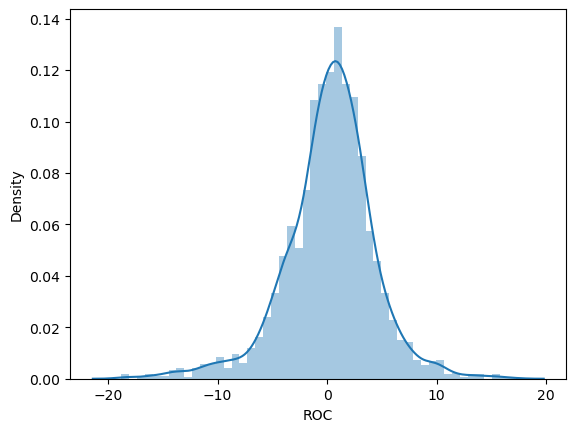

In [71]:
df['ROC'] = TA.ROC(ohlcv)
print(df['ROC'].describe())
sns.distplot(df['ROC'].dropna())
df.tail()

# CMFI

count          2431.0000
mean    11666835709.5187
std      6137660906.0302
min     -8174940909.9709
25%     10432278415.0164
50%     13597426857.8323
75%     15517297915.0876
max     19157612189.2948
Name: CFI, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6372\3380674280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CFI'] = TA.CFI(ohlcv)
c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI
Date,,,,,,,,,,,,,,,,,,,,
2017-11-27,10836.8203,10856.0000,10746.7402,10750.9297,10750.9297,2668100,-1,51.8056,-46.6449,10690.6778,10771.4790,10778.8593,10801.4256,10812.0876,24.3347,0.4619,3.1244,0.0287,0.0713,19155111008.1090
2017-11-28,10733.5596,10752.5801,10692.5303,10707.0703,10707.0703,2961000,-1,48.0033,-62.1763,10699.9556,10758.5973,10771.7556,10810.8021,10768.4651,-46.2921,-9.4746,-2.8993,-0.0273,-0.2385,19131841227.1809
2017-11-29,10735.2402,10762.9102,10697.6201,10713.5498,10713.5498,3096300,-1,48.6035,-59.8818,10710.1288,10749.5878,10764.2495,10803.1265,10742.9017,-33.9320,-7.7256,-6.3501,-0.0594,0.2773,19116450033.9961
2017-11-30,10623.2002,10650.1797,10560.4404,10560.4404,10560.4404,4939100,0,37.5687,-100.0000,10715.7507,10711.7583,10724.1547,10765.3660,10651.8030,-157.8802,-34.9933,-18.1775,-0.1696,-1.1859,18966362237.0154
2017-12-01,10591.6201,10665.9199,10495.1504,10600.3701,10600.3701,3776200,0,41.3110,-72.8465,10719.0485,10689.4807,10695.1836,10716.1467,10614.1731,-141.5523,-24.3458,-22.2744,-0.2078,-0.2848,18870978127.8379


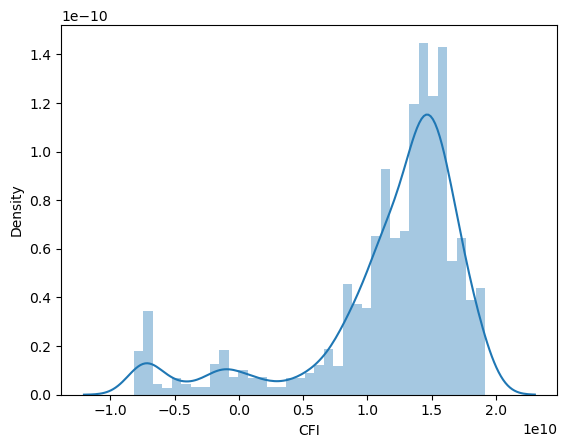

In [72]:
df['CFI'] = TA.CFI(ohlcv)
print(df['CFI'].describe())
sns.distplot(df['CFI'].dropna())
df.tail()

# DMI

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6372\3167327712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DMI'] = TA.DMI(ohlcv)['DI+'] - TA.DMI(ohlcv)['DI-']
c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count   2427.0000
mean      -0.9161
std       16.6154
min     -104.8152
25%      -11.7043
50%        1.0794
75%       10.7963
max       43.7253
Name: DMI, dtype: float64


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,...,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-27,10836.8203,10856.0000,10746.7402,10750.9297,10750.9297,2668100,-1,51.8056,-46.6449,10690.6778,...,10778.8593,10801.4256,10812.0876,24.3347,0.4619,3.1244,0.0287,0.0713,19155111008.1090,-0.2551
2017-11-28,10733.5596,10752.5801,10692.5303,10707.0703,10707.0703,2961000,-1,48.0033,-62.1763,10699.9556,...,10771.7556,10810.8021,10768.4651,-46.2921,-9.4746,-2.8993,-0.0273,-0.2385,19131841227.1809,-4.9121
2017-11-29,10735.2402,10762.9102,10697.6201,10713.5498,10713.5498,3096300,-1,48.6035,-59.8818,10710.1288,...,10764.2495,10803.1265,10742.9017,-33.9320,-7.7256,-6.3501,-0.0594,0.2773,19116450033.9961,-3.6350
2017-11-30,10623.2002,10650.1797,10560.4404,10560.4404,10560.4404,4939100,0,37.5687,-100.0000,10715.7507,...,10724.1547,10765.3660,10651.8030,-157.8802,-34.9933,-18.1775,-0.1696,-1.1859,18966362237.0154,-14.9574
2017-12-01,10591.6201,10665.9199,10495.1504,10600.3701,10600.3701,3776200,0,41.3110,-72.8465,10719.0485,...,10695.1836,10716.1467,10614.1731,-141.5523,-24.3458,-22.2744,-0.2078,-0.2848,18870978127.8379,-18.9513


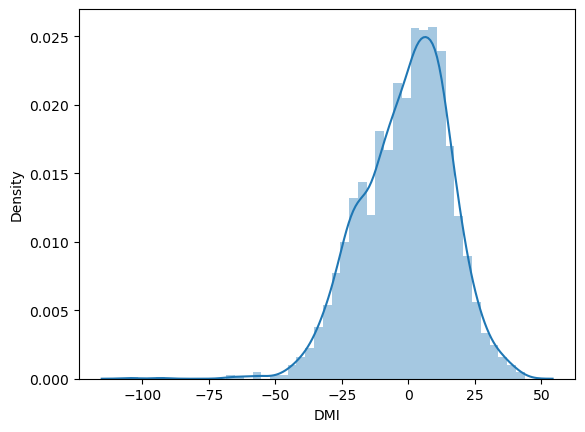

In [73]:
df['DMI'] = TA.DMI(ohlcv)['DI+'] - TA.DMI(ohlcv)['DI-']
print(df['DMI'].describe())
sns.distplot(df['DMI'].dropna())
df.tail()

# SAR

count    2440.0000
mean     8160.2866
std      1263.1784
min      3955.4299
25%      7528.5569
50%      8240.5838
75%      8961.5487
max     10882.6504
Name: SAR, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6372\1481618610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SAR'] = TA.SAR(ohlcv)
c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,...,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-27,10836.8203,10856.0000,10746.7402,10750.9297,10750.9297,2668100,-1,51.8056,-46.6449,10690.6778,...,10801.4256,10812.0876,24.3347,0.4619,3.1244,0.0287,0.0713,19155111008.1090,-0.2551,10632.8092
2017-11-28,10733.5596,10752.5801,10692.5303,10707.0703,10707.0703,2961000,-1,48.0033,-62.1763,10699.9556,...,10810.8021,10768.4651,-46.2921,-9.4746,-2.8993,-0.0273,-0.2385,19131841227.1809,-4.9121,10642.8029
2017-11-29,10735.2402,10762.9102,10697.6201,10713.5498,10713.5498,3096300,-1,48.6035,-59.8818,10710.1288,...,10803.1265,10742.9017,-33.9320,-7.7256,-6.3501,-0.0594,0.2773,19116450033.9961,-3.6350,10652.3968
2017-11-30,10623.2002,10650.1797,10560.4404,10560.4404,10560.4404,4939100,0,37.5687,-100.0000,10715.7507,...,10765.3660,10651.8030,-157.8802,-34.9933,-18.1775,-0.1696,-1.1859,18966362237.0154,-14.9574,10882.6504
2017-12-01,10591.6201,10665.9199,10495.1504,10600.3701,10600.3701,3776200,0,41.3110,-72.8465,10719.0485,...,10716.1467,10614.1731,-141.5523,-24.3458,-22.2744,-0.2078,-0.2848,18870978127.8379,-18.9513,10882.6504


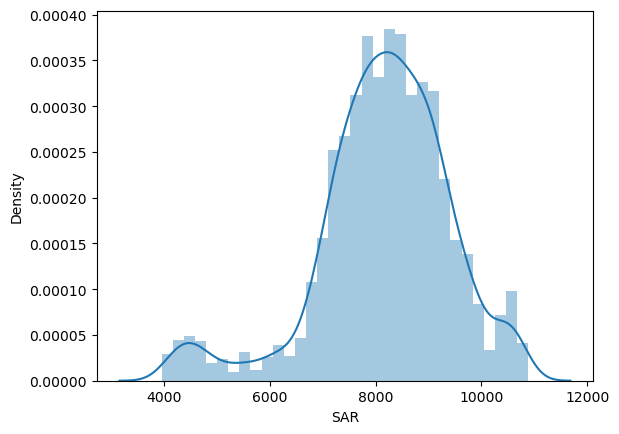

In [74]:
df['SAR'] = TA.SAR(ohlcv)
print(df['SAR'].describe())
sns.distplot(df['SAR'].dropna())
df.tail()

# 定義features(X) label(y)

In [75]:
print(df.shape)
df = df.dropna(axis=0)#刪除有缺失的row,會缺失主要因為用時間rolling計算技術指標導致,正常的
features = ['RSI','Williams %R','SMA','EMA','WMA','HMA','TEMA','CCI','CMO','MACD','PPO','ROC','CFI','DMI','SAR']
y_name = 'triple_barrier_signal' #當作labels
df = df[features+[y_name]]
print(df.shape)
df.tail()

(2440, 22)
(2400, 16)


,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Date,,,,,,,,,,,,,,,,
2017-11-27,51.8056,-46.6449,10690.6778,10771.4790,10778.8593,10801.4256,10812.0876,24.3347,0.4619,3.1244,0.0287,0.0713,19155111008.1090,-0.2551,10632.8092,-1
2017-11-28,48.0033,-62.1763,10699.9556,10758.5973,10771.7556,10810.8021,10768.4651,-46.2921,-9.4746,-2.8993,-0.0273,-0.2385,19131841227.1809,-4.9121,10642.8029,-1
2017-11-29,48.6035,-59.8818,10710.1288,10749.5878,10764.2495,10803.1265,10742.9017,-33.9320,-7.7256,-6.3501,-0.0594,0.2773,19116450033.9961,-3.6350,10652.3968,-1
2017-11-30,37.5687,-100.0000,10715.7507,10711.7583,10724.1547,10765.3660,10651.8030,-157.8802,-34.9933,-18.1775,-0.1696,-1.1859,18966362237.0154,-14.9574,10882.6504,0
2017-12-01,41.3110,-72.8465,10719.0485,10689.4807,10695.1836,10716.1467,10614.1731,-141.5523,-24.3458,-22.2744,-0.2078,-0.2848,18870978127.8379,-18.9513,10882.6504,0


# features scaling(特徵縮放)

In [76]:
from sklearn.preprocessing import MinMaxScaler
import pickle
min_max_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[features] = min_max_scaler.fit_transform(df_minmax[features])#縮放到0-1之間
with open('scaler.pkl', 'wb') as f:
    pickle.dump(min_max_scaler, f)
df_minmax.tail()

,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Date,,,,,,,,,,,,,,,,
2017-11-27,0.5780,0.5336,0.9955,0.9969,0.9962,0.9973,0.9953,0.5480,0.5272,0.6214,0.5141,0.5246,0.9999,0.5972,0.9639,-1
2017-11-28,0.5255,0.3782,0.9969,0.9949,0.9951,0.9987,0.9888,0.4492,0.4669,0.5932,0.4958,0.5160,0.9991,0.5546,0.9654,-1
2017-11-29,0.5338,0.4012,0.9986,0.9935,0.9940,0.9975,0.9850,0.4665,0.4775,0.5771,0.4854,0.5303,0.9985,0.5663,0.9668,-1
2017-11-30,0.3814,0.0000,0.9995,0.9877,0.9879,0.9919,0.9715,0.2931,0.3122,0.5219,0.4495,0.4896,0.9930,0.4626,1.0000,0
2017-12-01,0.4331,0.2715,1.0000,0.9842,0.9835,0.9846,0.9659,0.3160,0.3767,0.5027,0.4370,0.5147,0.9895,0.4260,1.0000,0


In [77]:
df = df_minmax
print('特徵縮放完成!')

特徵縮放完成!


# 定義X,y pair

https://sharegpt.com/c/KcXGMUL

In [78]:
from tqdm import tqdm
import numpy as np

#定義觀察天數,起始index(0),結束index(資料筆數-觀察天數)
days = 15
start_index = 0
end_index = len(df)-days

#特徵欄位
features = df.drop(y_name,axis=1).columns.tolist()

#待存放序列
Xs = []
ys = []
indexs = []

'''
若資料筆數100,days=15天,f_index=85,i只會跑到84,i+days=99,features只會跑到98天.
若資料筆數100,days=15天,f_index=85+1,i會跑到85,i+days=100,features會跑到99天.
'''
for i in tqdm(range(start_index ,end_index+1 ,1)):#每次i都會遞增1
  X = df.iloc[i:i+days,:][features] #ex:若i為0,則i+days為15因此數據index為0...14(不含15)之features
  y = df.iloc[i+days-1:i+days,:][y_name]#ex:若i為0days為15則[i+days-1:i+days]為[14:15]相當於index[14]之y_name('triple_barrier_signal')
  X = np.array(X) # 轉成np_array
  Xs.append(X) #加入至list
  ys.append(y) #加入至list
  indexs.append((df.iloc[[i]].index,df.iloc[[i+days-1]].index)) #加入資料日期
#轉換成np_array
Xs = np.array(Xs)
ys = np.array(ys)
print('準備完成')

100%|██████████| 2386/2386 [00:02<00:00, 910.09it/s]

準備完成


# check 資料總數跟 資料時間範圍

In [79]:
print('資料筆數:',len(Xs))
print('第一筆的index開始和結束:{}-{}'.format(indexs[0][0].date[0],indexs[0][1].date[0]))
print('最後一筆的index開始和結束:{}-{}'.format(indexs[-1][0].date[0],indexs[-1][1].date[0]))

資料筆數: 2386
第一筆的index開始和結束:2008-03-07-2008-03-27
最後一筆的index開始和結束:2017-11-13-2017-12-01


# Reshape X (圖片數量,長,寬,1張)

In [80]:
print(Xs.shape)
Xs = Xs.reshape(-1,days,len(features),1)
print(Xs.shape)

(2386, 15, 15)
(2386, 15, 15, 1)


# One hot encoding of label(獨熱編碼)

原始y代表漲幅

In [81]:
print('One hot encoding前')
print(ys.shape)
print(ys[:5])
from keras.utils.np_utils import to_categorical
ys = to_categorical(ys, num_classes = 3)
print('One hot encoding後')
print(ys.shape)
print(ys[:5])

One hot encoding前
(2386, 1)
[[1]
 [1]
 [1]
 [1]
 [1]]
One hot encoding後
(2386, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


# Visualization

https://sharegpt.com/c/lQ0OLk6

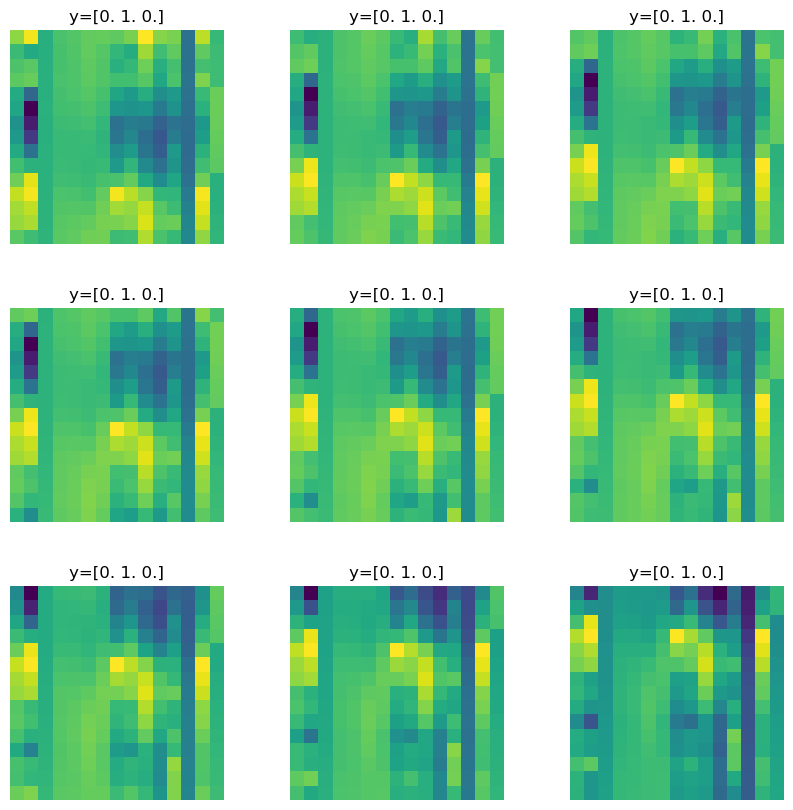

In [82]:
import matplotlib.pyplot as plt

# n为batch大小，这里设为9
n = 9

# 生成一个九宫格的画布
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# 遍历batch中的每一个样本，依次画出对应的矩阵和标注
for i in range(n):
    # 获取当前样本的矩阵和标注
    x = Xs[i]
    y = ys[i]
    
    # 在对应的子图上画出矩阵和标注
    axs[i//3, i%3].imshow(x)
    axs[i//3, i%3].set_title('y={}'.format(y))
    axs[i//3, i%3].axis('off')

# 调整子图之间的距离
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# 显示画布
plt.show()


# Split training and test sets

In [83]:
X_test = Xs[-40:] #最後40天features當作test資料
X_train,y_train = Xs[:-40],ys[:-40] #其他當作訓練
print(X_train.shape,y_train.shape,X_test.shape)

(2346, 15, 15, 1) (2346, 3) (40, 15, 15, 1)


# 調整採樣

https://sharegpt.com/c/Vm1VcLs

In [84]:
X_train2維 = X_train.reshape(X_train.shape[0],-1)
y_train數字 = np.array([ np.argmax(i) for i in y_train])
print(X_train2維.shape)
print(y_train數字.shape)

from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
X_train平衡 ,y_train平衡 = ros.fit_resample(X_train2維 ,y_train數字)
print(pd.DataFrame(y_train平衡)[0].value_counts().sort_index())#顯示結果

X_train = X_train平衡.reshape(X_train平衡.shape[0],15,15,1)#資料數,15,15,1
y_train = y_train平衡.reshape(y_train平衡.shape[0],1)#資料數,1
y_train = to_categorical(y_train , num_classes = 3)#one_hot
print(X_train.shape)
print(y_train.shape)

(2346, 225)
(2346,)
0    601
1    601
2    601
Name: 0, dtype: int64
(1803, 15, 15, 1)
(1803, 3)


# Split training and val sets

https://sharegpt.com/c/ZgCDypE

In [85]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(
    X_train,
    y_train, 
    test_size = 0.2,
    random_state = 42,
    shuffle = True,#是否洗牌
    stratify = y_train #是否根據y欄位做分層取樣
    )
print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(1442, 15, 15, 1) (1442, 3) (361, 15, 15, 1) (361, 3)


# 看一下樣本的label分布情況是否平均(待解決)

0:Hold,1:Buy,2:Sell

In [86]:
pd.Series([np.argmax(i) for i in ys]).value_counts()

1    985
2    773
0    628
dtype: int64

In [87]:
pd.Series([np.argmax(i) for i in y_train]).value_counts()

0    601
1    601
2    601
dtype: int64

In [88]:
pd.Series([np.argmax(i) for i in ytrain]).value_counts()

1    481
2    481
0    480
dtype: int64

In [89]:
pd.Series([np.argmax(i) for i in yval]).value_counts()

0    121
2    120
1    120
dtype: int64

# 用chatgpt幫忙製作模型

https://sharegpt.com/c/M7VugUR

In [90]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

# 創建一個序列模型
model = Sequential()

# 添加第一個卷積層，使用32個3x3的卷積核，使用ReLU激活函數，並指定輸入形狀
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(15, 15, 1)))

# 添加第二個卷積層，使用64個3x3的卷積核，使用ReLU激活函數
model.add(Conv2D(64, (3, 3), activation='relu'))

# 添加第三個卷積層，使用128個3x3的卷積核，使用ReLU激活函數
model.add(Conv2D(128, (3, 3), activation='relu'))

# 添加平坦層，將卷積層的輸出展開為一維數組
model.add(Flatten())

# 添加dropout層，防止過度擬合
model.add(Dropout(0.5))

# 添加全連接層，使用softmax激活函數，輸出3個類別
model.add(Dense(3, activation='softmax'))

# 編譯模型，使用交叉熵損失函數和Adam優化器
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 打印模型結構
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 10368)             0         
                                                                 
 dropout_1 (Dropout)         (None, 10368)             0         
                                                                 
 dense_1 (Dense)             (None, 3)                 31107     
                                                                 
Total params: 123,779
Trainable params: 123,779
Non-tr

In [91]:
'''
nclasses = 3 
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(15,15,1)))#15,15,32
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))#15,15,64
model.add(MaxPool2D(pool_size=(5,5)))# 3,3,64
model.add(Flatten())#576
model.add(Dropout(0.5))#288
model.add(Dense(128, activation='relu'))#128
model.add(Dropout(0.5))#64
model.add(Dense(32, activation='relu'))#32
model.add(Dropout(0.5))#16
model.add(Dense(nclasses, activation='softmax'))#3
model.summary()
'''

"\nnclasses = 3 \nmodel = Sequential()\nmodel.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(15,15,1)))#15,15,32\nmodel.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))#15,15,64\nmodel.add(MaxPool2D(pool_size=(5,5)))# 3,3,64\nmodel.add(Flatten())#576\nmodel.add(Dropout(0.5))#288\nmodel.add(Dense(128, activation='relu'))#128\nmodel.add(Dropout(0.5))#64\nmodel.add(Dense(32, activation='relu'))#32\nmodel.add(Dropout(0.5))#16\nmodel.add(Dense(nclasses, activation='softmax'))#3\nmodel.summary()\n"

# 編譯模型

In [92]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 定義訓練過程的早停法機制

In [93]:
es = EarlyStopping(monitor='val_accuracy',#驗證集acc
                   min_delta=0.001, 
                   patience=20,  
                   mode='max',
                   restore_best_weights=True)#恢復最佳權重

# fit

In [94]:
history = model.fit(
    xtrain,
    ytrain,
    batch_size = 128,
    epochs = 200,
    validation_data=(xval,yval),
    verbose=1,callbacks=[es]
    )

Epoch 1/200
12/12 [==============================] - 2s 83ms/step - loss: 1.0960 - accuracy: 0.3419 - val_loss: 1.0761 - val_accuracy: 0.4044
Epoch 2/200
12/12 [==============================] - 1s 71ms/step - loss: 1.0624 - accuracy: 0.4327 - val_loss: 1.0356 - val_accuracy: 0.4349
Epoch 3/200
12/12 [==============================] - 1s 73ms/step - loss: 1.0116 - accuracy: 0.4709 - val_loss: 0.9599 - val_accuracy: 0.5235
Epoch 4/200
12/12 [==============================] - 1s 74ms/step - loss: 0.9936 - accuracy: 0.4778 - val_loss: 0.9706 - val_accuracy: 0.5374
Epoch 5/200
12/12 [==============================] - 1s 74ms/step - loss: 0.9839 - accuracy: 0.4951 - val_loss: 0.9798 - val_accuracy: 0.4598
Epoch 6/200
12/12 [==============================] - 1s 71ms/step - loss: 0.9649 - accuracy: 0.5083 - val_loss: 0.9398 - val_accuracy: 0.5402
Epoch 7/200
12/12 [==============================] - 1s 68ms/step - loss: 0.9573 - accuracy: 0.5146 - val_loss: 0.9569 - val_accuracy: 0.5291
Epoch 

# chatgpt協助做訓練過程評估

https://sharegpt.com/c/1CqBYQz

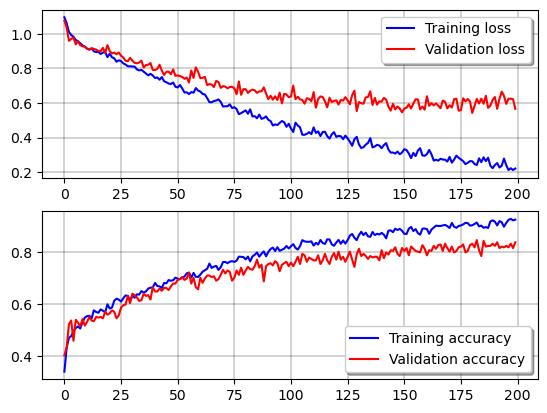

In [95]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

# chatgpt協助做混淆矩陣

https://sharegpt.com/c/0SZ8tM0

12/12 [==============================] - 0s 5ms/step


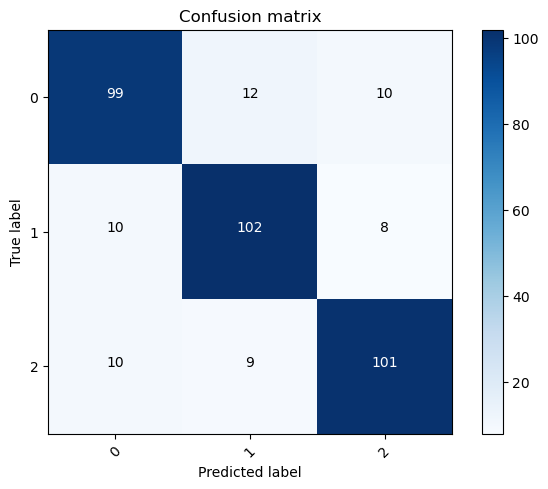

In [96]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#預測的y
ypred_onehot = model.predict(xval)
#轉換預測的y: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot,axis=1)
#轉換真實的y
ytrue = np.argmax(yval,axis=1)
#計算 confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)
#畫出 confusion matrix
nclasses = 3
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

# classification_report 

In [97]:
from sklearn.metrics import classification_report 
y_pred = model.predict(xval)
y_pred = [np.argmax(i) for i in y_pred]
y_pred = to_categorical(y_pred, num_classes = 3)
target_names = ['Hold','BUY','SELL']
print(classification_report(yval,y_pred,target_names=target_names))

12/12 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

        Hold       0.83      0.82      0.82       121
         BUY       0.83      0.85      0.84       120
        SELL       0.85      0.84      0.85       120

   micro avg       0.84      0.84      0.84       361
   macro avg       0.84      0.84      0.84       361
weighted avg       0.84      0.84      0.84       361
 samples avg       0.84      0.84      0.84       361



# 驗證集的準確度

In [98]:
def val_acc(yval,y_pred):
  t = []
  for i,j in zip(yval,y_pred):
    t.append(np.allclose(i,j))
  return np.mean(t)
val_acc(yval,y_pred)

0.8365650969529086

## 測試集預測

2/2 [==============================] - 0s 6ms/step
40
[*********************100%***********************]  1 of 1 completed


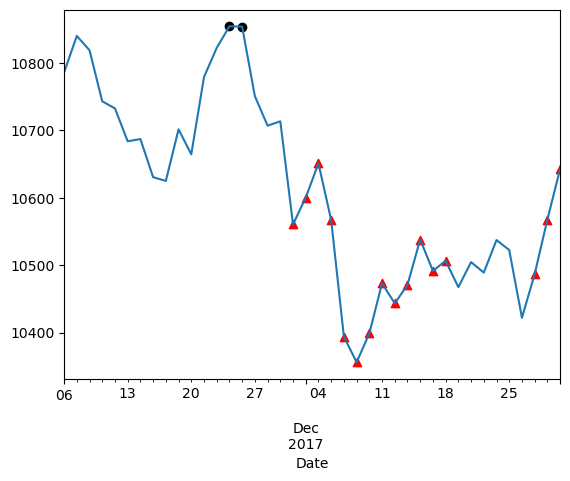

In [99]:
answer = model.predict(X_test)
answer = [ np.argmax(i) for i in answer]
print(len(answer))
C = pd.DataFrame()
C['Close'] = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)['Close']
C['SIGNAL'] = 0
C = C.tail(len(answer))
C['SIGNAL'] = answer 
buy = C[C['SIGNAL']==1]['Close']
sell = C[C['SIGNAL']==2]['Close']
C['Close'].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

# 製作交易訊號表格

In [100]:
import pandas as pd
# Set the float_format option to not use scientific notation
pd.set_option('display.float_format', '{:.4f}'.format)
np.set_printoptions(suppress=True)
C['HOLD%'] = model.predict(X_test)[:,0]
C['BUY%'] = model.predict(X_test)[:,1]
C['SELL%'] = model.predict(X_test)[:,2]
C.drop(['SIGNAL'],axis=1).tail(20)

2/2 [==============================] - 0s 6ms/step


,Close,HOLD%,BUY%,SELL%
Date,,,,
2017-12-04,10651.1104,0.1863,0.8136,0.0001
2017-12-05,10566.8496,0.2491,0.7508,0.0000
2017-12-06,10393.9199,0.2827,0.7173,0.0000
2017-12-07,10355.7598,0.1796,0.8204,0.0000
2017-12-08,10398.6201,0.0755,0.9245,0.0000
2017-12-11,10473.0898,0.0145,0.9855,0.0000
2017-12-12,10443.2803,0.0094,0.9906,0.0000
2017-12-13,10470.7002,0.0158,0.9842,0.0000
2017-12-14,10538.0098,0.0209,0.9791,0.0000


# 保存模型

In [101]:
model.save('model.h5')
del model
from keras.models import load_model
model = load_model('model.h5')
predict = model.predict(X_test)
predict[-5:]

2/2 [==============================] - 0s 5ms/step


array([[0.99213326, 0.00674147, 0.00112519],
       [0.90676135, 0.08895899, 0.00427966],
       [0.4242929 , 0.56333333, 0.01237378],
       [0.06339464, 0.92523223, 0.01137304],
       [0.31614643, 0.55324346, 0.13061017]], dtype=float32)